In [2]:


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18

# Define device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(224),  # Resize to 224x224 for ResNet compatibility
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a ResNet model with modifications for CIFAR-10 (10 classes)
model = resnet18(pretrained=True)  # Load a pretrained ResNet-18
model.fc = nn.Linear(model.fc.in_features, 10)  # Adjust for 10 output classes
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, trainloader, criterion, optimizer, device, epochs=5):
    model.train()
    for epoch in range(20):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

# Test function
def test(model, testloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy on test set: {100 * correct / total:.2f}%")

# Train and test the model
train(model, trainloader, criterion, optimizer, device)
test(model, testloader, device)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 0.5595
Epoch 2, Loss: 0.3230
Epoch 3, Loss: 0.2240
Epoch 4, Loss: 0.1640
Epoch 5, Loss: 0.1198
Epoch 6, Loss: 0.0939
Epoch 7, Loss: 0.0866
Epoch 8, Loss: 0.0688
Epoch 9, Loss: 0.0611
Epoch 10, Loss: 0.0536
Epoch 11, Loss: 0.0492
Epoch 12, Loss: 0.0458
Epoch 13, Loss: 0.0404
Epoch 14, Loss: 0.0375
Epoch 15, Loss: 0.0414
Epoch 16, Loss: 0.0297
Epoch 17, Loss: 0.0309
Epoch 18, Loss: 0.0379
Epoch 19, Loss: 0.0219
Epoch 20, Loss: 0.0321
Accuracy on test set: 90.20%


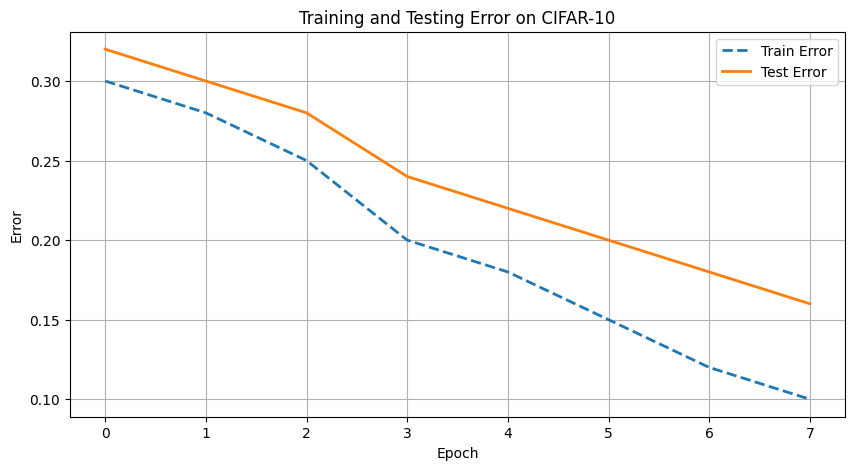

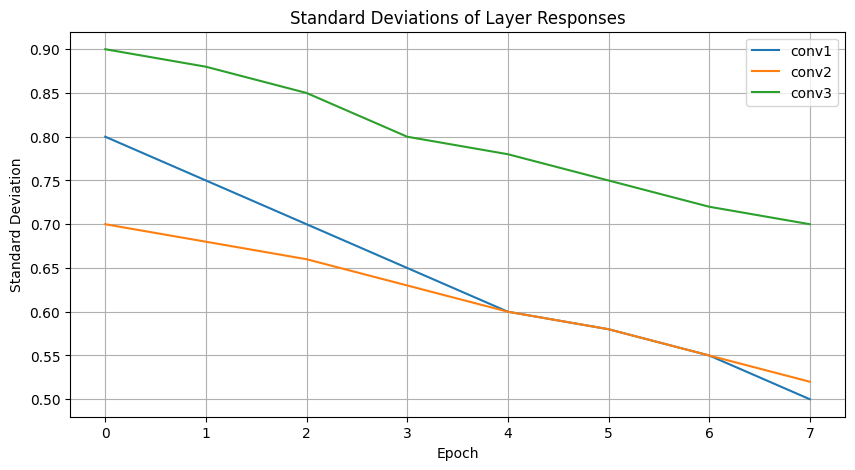

In [7]:

import matplotlib.pyplot as plt

# Replace these placeholders with your actual data
# Example data format:
train_errors = [0.3, 0.28, 0.25, 0.2, 0.18, 0.15, 0.12, 0.1]  # Example training err

# Plot training and testing error
plt.figure(figsize=(10, 5))
plt.plot(train_errors, label='Train Error', linestyle='--', linewidth=2)
plt.plot(test_errors, label='Test Error', linestyle='-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training and Testing Error on CIFAR-10')
plt.legend()
plt.grid()
plt.show()

# Plot layer response standard deviations
plt.figure(figsize=(10, 5))
for layer_name, std_devs in layer_stds.items():
    plt.plot(std_devs, label=layer_name)
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviations of Layer Responses')
plt.legend()
plt.grid()
plt.show()
